In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import json

[nltk_data] Downloading package stopwords to /Users/tommy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os

import numpy as nrc_py
import pandas as pnl_data
from pandas import *
import sklearn

In [3]:
import random
skipped = random.sample(range(1, 1226258), 1164945)

In [4]:
# Downsize the dataset to the first 50K headlines (~5% samples)
# 1226258 x 0.95 =~ 1164945

In [5]:
print(len(skipped))
print(type(skipped))

1164945
<class 'list'>


In [6]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path, skiprows=[i for i in skipped])
    #column_list = data.columns.values.tolist()
    #column_list.remove('publish_date')
    #print(type(data))
    
    X = data['headline_text'].tolist()
    text = data.headline_text.unique()
    #print(data.headline_text.unique())
    return X, text

In [7]:
data, raw_text = read_data_from_csv("./abcnews-date-text.csv")
#print(X)

In [8]:
data

['barca take record as robson celebrates birthday in',
 'expressions of interest sought to build livestock',
 'gilchrist backs rest policy',
 'man charged over cooma murder',
 'meeting to consider tick clearance costs',
 'onesteel to invest 80m in whyalla steelworks',
 'qantas international crews to strike over pay',
 'sa premier calls for action over river murray',
 'stop changing the rules fans tell afl',
 'webb favourite for ladies masters',
 'claim tas education policy causing high indigenous',
 'dixon dismisses qantas monopoly claim',
 'former treasurer charged with starting fire on sa',
 'uzbek journalist sentenced to seven years in jail',
 'candleholders recalled as fire risk',
 'claims more rain will boost stock prices',
 'demons thump tigers',
 'farmers celebrate good rain',
 'group gets clearer understanding of farmers gm',
 'indian jailed for smuggling pakistani in suitcase',
 'no cost blowouts forecast for water treatment plan',
 'push to extend fraser is world heritage lis

In [9]:
raw_text

array(['barca take record as robson celebrates birthday in',
       'expressions of interest sought to build livestock',
       'gilchrist backs rest policy', ...,
       'oxford astrazeneca covid 19 vaccine roll out in united kingdom',
       'well preserved ice age woolly rhino found in siberia',
       'womens shed canberra reskilling unemployed pandemic'],
      dtype=object)

In [10]:
type(data)

list

In [11]:
type(raw_text)

numpy.ndarray

In [12]:
print(len(data))
print(len(raw_text))

61313
60662


In [13]:
lem = nltk.stem.wordnet.WordNetLemmatizer()
text = []
for sentence in raw_text:
    text.append(" ".join([lem.lemmatize(i) for i in sentence.split()]))

In [ ]:
"""
data = []
for i in range(50000):
    data.append(X[i])
"""

In [ ]:
"""
print(type(text))
print(len(data))
print(len(text))
"""

In [ ]:
"""
#df1 = pd.DataFrame({'document':data})
df = pnl_data.DataFrame({'document':text})
"""

In [ ]:
"""
# removing everything except alphabets`
#df1['clean_doc'] = df1['document'].str.replace("[^a-zA-Z#]", " ")
df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")
"""

In [ ]:
"""
# removing short words
#df1['clean_doc'] = df1['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
"""

In [ ]:
"""
df
"""

In [14]:
stop_words = stopwords.words('english')

In [ ]:
"""
# tokenization
#tokenized_doc1 = df1['clean_doc'].apply(lambda x: x.split())
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())
"""

In [ ]:
"""
tokenized_doc
"""

In [ ]:
"""
# remove stop-words
#tokenized_doc1 = tokenized_doc1.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)
"""

In [ ]:
"""
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)
"""

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
# tf-idf (term frequency-inverse document frequency)
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5)
tfidf_matrix = tfidf_vectorizer.fit_transform(text)
tfidf_words = tfidf_vectorizer.get_feature_names()

# bag of words (term frequency)
tf_vectorizer = CountVectorizer(stop_words=stop_words, max_df = 0.5)
tf_matrix = tf_vectorizer.fit_transform(text)
tf_words = tf_vectorizer.get_feature_names()

tfidf_matrix.shape, tf_matrix.shape

((60662, 27253), (60662, 27253))

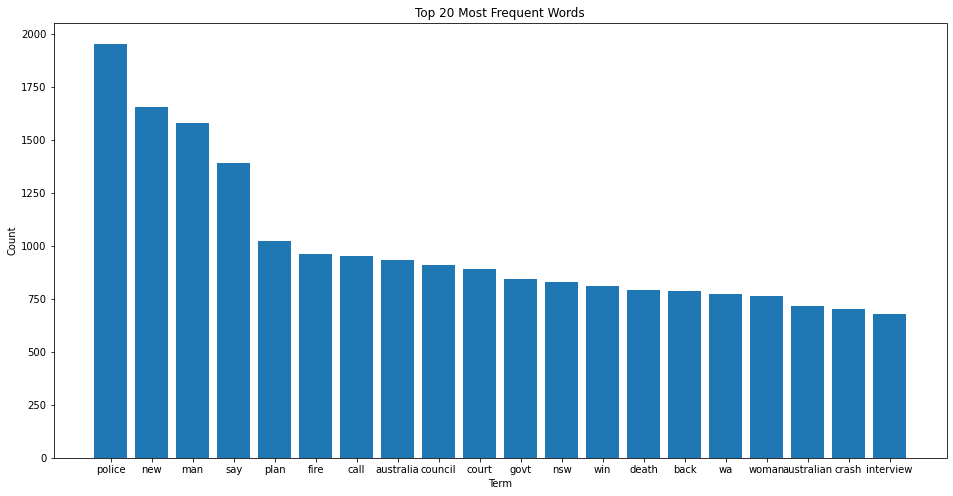

In [17]:
# get word frequencies from the bag of words and sort them by count in descending order
term_frequency = [(term, tf_matrix.sum(axis=0)[0, i]) for term, i in tf_vectorizer.vocabulary_.items()]
term_frequency = sorted(term_frequency, key = lambda x: x[1], reverse=True)
terms = [i[0] for i in term_frequency[:20]] # get top 20 words
count = [i[1] for i in term_frequency[:20]] # get counts of top 20 words

# plot the 20 most frequent words in a bar chart
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(terms)), count)
ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms)
ax.set_title('Top 20 Most Frequent Words')
ax.set_xlabel('Term')
ax.set_ylabel('Count')
plt.savefig('Top 20 Most Frequent Words.png', dpi=200)
plt.show()

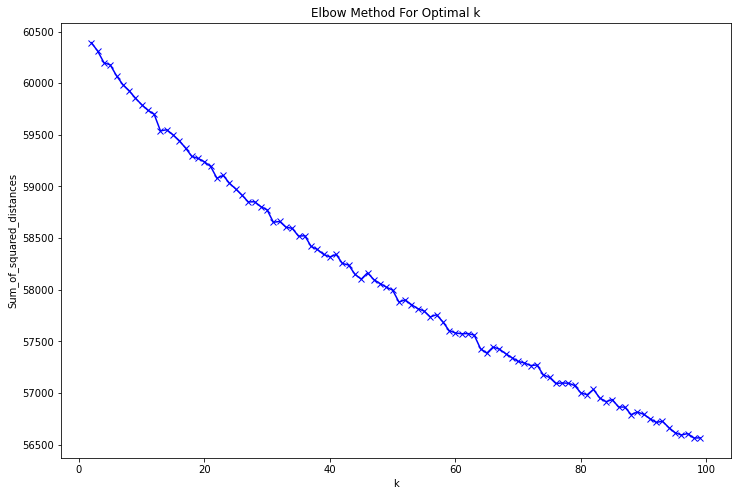

value of K: 
44


In [18]:
Sum_of_squared_distances = []
K = range(2,100)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(12,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('value of K: ')
true_k = int(input())

In [19]:
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model_matrix = model.fit(tfidf_matrix)
model_centroids = model.cluster_centers_.argsort()[:, ::-1]

labels=model.labels_.tolist()
#clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
#print(clusters.sort_values(by=['cluster']))

#for i in range(true_k):
#    print(clusters[clusters['cluster'] == i])

In [20]:
clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])

                                                   title  cluster
49272  jarryd hayne rubbish foolish report of nrl ret...        0
31669                       bluescope steel cut 1000 job        0
48970                      super moon sun face off in wa        0
19500     della bosca talk to abc 702 morning host sarah        0
19502     first cut rudd lay wreath for hiroshima victim        0
...                                                  ...      ...
12808                      dog demon to play in canberra       43
25886                  canberra swelters through january       43
29413               canberra driver face dozen of charge       43
17385              rudd should live in canberra stanhope       43
60661  woman shed canberra reskilling unemployed pand...       43

[60662 rows x 2 columns]
                                                   title  cluster
10     claim ta education policy causing high indigenous        0
22           racv not surprised by petrol rationin

In [21]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(true_k)
lsa_matrix = lsa.fit_transform(tfidf_matrix)
km_lsa = KMeans(true_k).fit(lsa_matrix) # LSA-based k-means
lsa_labels=km_lsa.labels_.tolist()

In [22]:
lsa_clusters=pnl_data.DataFrame(list(zip(text,lsa_labels)),columns=['title','cluster'])
print(lsa_clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(lsa_clusters[lsa_clusters['cluster'] == i])

                                                   title  cluster
10622     public urged to have say on draft fishery bill        0
17070           no alcoholic exodus say fitzroy crossing        0
42663                medicare easy to defraud say expert        0
47553  nauru say free speech crackdown protects asylu...        0
57617      our worker arent afraid to talk say sigma bos        0
...                                                  ...      ...
32789          sexual abuse court martial hears evidence       43
32791   uk high court say assange can appeal extradition       43
20615   scene outside court where some of the where some       43
18593           pair to front court over sydney stabbing       43
1309   aboriginal activist appears in court on sex ch...       43

[60662 rows x 2 columns]
                                                   title  cluster
117        pope say all avenue to peace must be explored        0
190           bali not linked to iraq say bombing 

In [23]:
def top_words_cluster(model_name, centers):
    ''' prints the top 20 words of each cluster
        from the centroids of the k-means models '''
    print(model_name)
    for i in range(true_k):
        print("Cluster %d: " % i, end="")
        print(" ".join([tfidf_words[c] for c in centers[i, :20]]))
    print()

In [24]:
top_words_cluster(" ---K-M---", model_centroids)

 ---K-M---
Cluster 0: plan report wa election change hospital job cut mp sa talk pm labor return minister push group green fear indigenous
Cluster 1: call medium inquiry reject spark police action prompt mp change help ban group election opposition law end govt centre review
Cluster 2: guilty pleads found murder man plead charge plea assault woman manslaughter death former stabbing son officer murdering driving court rape
Cluster 3: jailed tax man carbon cut mining year sex fraud attack woman assault budget wife murder killing super poky company labor
Cluster 4: attack killed two kill dead violence bomb blast soldier iraq domestic car suicide accident least four pakistan dozen baghdad found
Cluster 5: back take nsw year price claim home hit final face qld test show top china rise lead open aussie record
Cluster 6: warning issue prompt spark issued fire severe safety flood weather police storm health nsw death cyclone emergency trigger sound case
Cluster 7: business hope confidence spea

In [25]:
top_words_cluster(" ---LSA-KM---", lsa.inverse_transform(km_lsa.cluster_centers_).argsort()[:, ::-1])

 ---LSA-KM---
Cluster 0: say minister opposition need labor mp may expert police health group wont could trump public coronavirus home ha chief union
Cluster 1: get win take world sa rise hospital cup wa health home drug coronavirus day service south worker china price farmer
Cluster 2: police investigate probe officer shooting arrest hunt drug attack seek assault search driver car fatal help chase sydney witness station
Cluster 3: fire house crew blaze service resident warning threat school ban damage suspicious factory sa battle home melbourne danger spark emergency
Cluster 4: water price report restriction take get national govt supply plan cut sydney murray boost found china pm allocation green first
Cluster 5: missing search found police continues man body fear find fisherman woman coast boy change girl resume teen hospital child guilty
Cluster 6: interview extended nrl matt michael luke andrew james ben mark david afl scott brett john chris sam steve speaks nathan
Cluster 7: coun

In [26]:
clusters.to_csv('clusters_result.csv', index=False)
lsa_clusters.to_csv('lsa_clusters_result.csv', index=False)

In [ ]:
#https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8
#https://stats.stackexchange.com/questions/87950/distortion-function-for-k-means-algorithm

In [ ]:
#https://nbviewer.org/github/domreichl/blog-post-clustering/blob/master/blog_post_clustering.ipynb